In [21]:
from LoopStructural import GeologicalModel
from LoopStructural.modelling.fault.fault_function import BaseFault
from LoopStructural.visualisation import LavaVuModelViewer
from LoopStructural.utils.helper import strike_dip_vector
# import other libraries
import pandas as pd
import numpy as np
import logging
# logging.getLogger().setLevel(logging.INFO)

In [22]:
fault_fault_relations = pd.read_csv('data/fault-fault-relationships.csv')
fault_strat_relations = pd.read_csv('data/group-fault-relationships.csv')

In [23]:
fault_fault_relations

,fault_id,313,2837,813,958,815,12641,16503,2225,16740,...,16744,12627,16767,2246,16816,5986,17182,16896,17031,17127
0,313,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2837,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,813,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,958,0,0,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,815,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74,5986,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
75,17182,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
76,16896,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
77,17031,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [24]:
fault_fault_relations[fault_fault_relations['313'] == 1]['fault_id'].to_numpy()

array([7344, 7966])

In [25]:
location_data = pd.read_csv('data/hams2_faults.csv')
location_data['val'] = 0
orientation_data = pd.read_csv('data/hams2_fault_orientations.csv')


In [26]:
df = pd.read_csv('data/test_data3/output/formation_thicknesses.csv')
thickness = {}
for f in df['formation'].unique():
    thickness[f] = np.mean(df[df['formation']==f]['thickness'])

In [27]:
order = ['A_HAu_xsl_ci',
'A_HAd_kd',
'A_HAm_cib',
'A_FOj_xs_b',
'A_FO_xo_a',
'A_FO_od',
'A_FOu_bbo',
'A_FOp_bs',
'A_FOo_bbo',
'A_FOh_xs_f',
'A_FOr_b',
'A_s_PMI',
'A_mgn_PRK']

In [28]:
strat_val = {}
val = 0
for o in order:
    if o in thickness:
        strat_val[o] = val
        val+=thickness[o]

In [29]:
orientations = pd.read_csv('data/test_data3/output/orientations.csv')
contacts = pd.read_csv('data/test_data3/output/contacts4.csv')
contacts['val'] = np.nan 

for o in strat_val:
    contacts.loc[contacts['formation']==o,'val'] = strat_val[o]
sdata = pd.concat([orientations,contacts],sort=False)


In [30]:
displacements = pd.read_csv('data/fault_displacements3.csv')

In [31]:
data = pd.concat([location_data,orientation_data,sdata],sort=True)
data['strike'] = data['azimuth']-90
data['nx'] = np.nan
data['ny'] = np.nan
data['nz'] = np.nan
data[['nx','ny','nz']] = strike_dip_vector(data['strike'],data['dip'])
data = data.reset_index(drop=True)

In [32]:
displacements[np.logical_and(np.abs(displacements['vertical_displacement'])>500,np.abs(displacements['vertical_displacement'])>1000)]

,X,Y,fname,apparent_displacement,vertical_displacement
10,530193.100235,7.489541e+06,Fault_3496,-3227,1902
15,527680.867203,7.490013e+06,Fault_12647,1974,1775
64,514456.268843,7.510127e+06,Fault_12660,1820,1043
70,521012.040045,7.512605e+06,Fault_16769,-1411,1017
98,539162.759905,7.463113e+06,Fault_7344,-32595,18528
99,531591.341034,7.465353e+06,Fault_7344,3819,1078
100,511878.167628,7.478935e+06,Fault_7344,32433,6231
106,506417.257805,7.491318e+06,Fault_7344,-3586,1151
115,581824.430395,7.486696e+06,Fault_6825,-5335,1101
120,580338.020429,7.480681e+06,Fault_2996,7468,2138


In [33]:
fault_names = displacements.fname.unique()

In [34]:
data

,X,Y,Z,azimuth,dip,formation,polarity,val,strike,nx,ny,nz
0,537479.487628,7.491876e+06,478,NaN,NaN,Fault_5475,NaN,0.0,NaN,NaN,NaN,NaN
1,540207.945575,7.490607e+06,565,NaN,NaN,Fault_5475,NaN,0.0,NaN,NaN,NaN,NaN
2,540639.121395,7.490337e+06,539,NaN,NaN,Fault_5475,NaN,0.0,NaN,NaN,NaN,NaN
3,541239.639831,7.489577e+06,589,NaN,NaN,Fault_5475,NaN,0.0,NaN,NaN,NaN,NaN
4,570368.812387,7.496846e+06,695,NaN,NaN,Fault_12644,NaN,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3000,548806.299615,7.491074e+06,588,NaN,NaN,P__HAj_xci_od,NaN,NaN,NaN,NaN,NaN,NaN
3001,551886.299490,7.491661e+06,663,NaN,NaN,P__HAj_xci_od,NaN,NaN,NaN,NaN,NaN,NaN
3002,556799.610022,7.491734e+06,704,NaN,NaN,P__HAj_xci_od,NaN,NaN,NaN,NaN,NaN,NaN
3003,562519.638375,7.492724e+06,603,NaN,NaN,P__HAj_xci_od,NaN,NaN,NaN,NaN,NaN,NaN


In [35]:
data = data.rename(columns={'formation':'type','azimuth':'old_azi','strke':'Strike'})
# data['type'] = np.nan
for o in order:
    data.loc[data['type']==o,'type'] = 's0'
data 
data

,X,Y,Z,old_azi,dip,type,polarity,val,strike,nx,ny,nz
0,537479.487628,7.491876e+06,478,NaN,NaN,Fault_5475,NaN,0.0,NaN,NaN,NaN,NaN
1,540207.945575,7.490607e+06,565,NaN,NaN,Fault_5475,NaN,0.0,NaN,NaN,NaN,NaN
2,540639.121395,7.490337e+06,539,NaN,NaN,Fault_5475,NaN,0.0,NaN,NaN,NaN,NaN
3,541239.639831,7.489577e+06,589,NaN,NaN,Fault_5475,NaN,0.0,NaN,NaN,NaN,NaN
4,570368.812387,7.496846e+06,695,NaN,NaN,Fault_12644,NaN,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
3000,548806.299615,7.491074e+06,588,NaN,NaN,P__HAj_xci_od,NaN,NaN,NaN,NaN,NaN,NaN
3001,551886.299490,7.491661e+06,663,NaN,NaN,P__HAj_xci_od,NaN,NaN,NaN,NaN,NaN,NaN
3002,556799.610022,7.491734e+06,704,NaN,NaN,P__HAj_xci_od,NaN,NaN,NaN,NaN,NaN,NaN
3003,562519.638375,7.492724e+06,603,NaN,NaN,P__HAj_xci_od,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
boundary_points = np.zeros((2,3))
boundary_points[0,0] = 500000.0000000026#origin[0]#-1000#-10 #np.min(coords[:,0])-10
boundary_points[0,1] = 7454093.693147668#origin[1]#-1000#-10 #np.min(coords[:,1])
boundary_points[0,2] = -20000#origin[2]#-4500#-5000#0#-40#minz
boundary_points[1,0] = 605065.8521#maximum[0]#10000#10000 #np.max(coords[:,0])
boundary_points[1,1] = 7567173.042479938#maximum[1]#10000#12000 #np.max(coords[:,1])
boundary_points[1,2] = 1500#maximum[2]#500#500#-50000#-minz*0.1

In [37]:
faults = []
model = GeologicalModel(boundary_points[0,:],boundary_points[1,:])
model.set_model_data(data)

In [38]:
model.data['type']

0          Fault_5475
1          Fault_5475
2          Fault_5475
3          Fault_5475
4         Fault_12644
            ...      
3000    P__HAj_xci_od
3001    P__HAj_xci_od
3002    P__HAj_xci_od
3003    P__HAj_xci_od
3004    P__HAj_xci_od
Name: type, Length: 3005, dtype: object

In [39]:
for f in fault_names:
    fault_data =  model.data[np.logical_and(model.data['type'] == f,~np.isnan(model.data['val']))].reset_index(drop=True)
    if fault_data.shape[0] > 0:
        fault_length = fault_data.loc[0,['X','Y','Z']].to_numpy()-fault_data.loc[len(fault_data)-1,['X','Y','Z']].to_numpy()
        fault_length = np.linalg.norm(fault_length)
        fault_length*=0.15
        model.data.loc[model.data['type']==f,['nx','ny','nz']] /= fault_length
        #print(fault_length)

In [40]:

for f in fault_names:
    if model.data[model.data['type'] == f].shape[0] == 0:
        continue
    fault_id = f[6:]
    overprints = []
    try:
        overprint_id = fault_fault_relations[fault_fault_relations[fault_id] == 1]['fault_id'].to_numpy()
        for i in overprint_id:
            overprints.append(['Fault_%i'%i])
    except:
        print('No entry for %s in fault_fault_relations'%f)
#     continue
    faults.append(model.create_and_add_fault(f,
                                             np.max(np.abs(displacements[displacements['fname']==f]['vertical_displacement'].to_numpy()))*2,
                                             faultfunction=BaseFault.fault_displacement,
                                                 interpolatortype='PLI',
                                                 nelements=1e4,
                                                 data_region=.5,
#                                                  regularisation=[1,1,1],
                                                 solver='pyamg',
                                                 damp=True,
                                                 buffer=0.1,
                                                 steps=1,
                                             overprints=overprints
#                                              gpw=100
                                                )
                 )
    

/home/lgrose/miniconda3/envs/loop/lib/python3.8/site-packages/LoopStructural-0.0.0-py3.8-linux-x86_64.egg/LoopStructural/modelling/core/geological_model.py:661: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fault_frame_data['coord'] = 0
/home/lgrose/miniconda3/envs/loop/lib/python3.8/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/home/lgrose/miniconda3/envs/loop/lib/python3.8/site-packages/LoopStructural-0.0.0-py3.8-linux-x86_64.egg/LoopStructura

No entry for Fault_5298 in fault_fault_relations


/home/lgrose/miniconda3/envs/loop/lib/python3.8/site-packages/LoopStructural-0.0.0-py3.8-linux-x86_64.egg/LoopStructural/modelling/core/geological_model.py:661: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fault_frame_data['coord'] = 0
/home/lgrose/miniconda3/envs/loop/lib/python3.8/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/home/lgrose/miniconda3/envs/loop/lib/python3.8/site-packages/LoopStructural-0.0.0-py3.8-linux-x86_64.egg/LoopStructura

No entry for Fault_1236 in fault_fault_relations


/home/lgrose/miniconda3/envs/loop/lib/python3.8/site-packages/LoopStructural-0.0.0-py3.8-linux-x86_64.egg/LoopStructural/modelling/core/geological_model.py:661: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fault_frame_data['coord'] = 0
/home/lgrose/miniconda3/envs/loop/lib/python3.8/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


No entry for Fault_2689 in fault_fault_relations


/home/lgrose/miniconda3/envs/loop/lib/python3.8/site-packages/LoopStructural-0.0.0-py3.8-linux-x86_64.egg/LoopStructural/modelling/core/geological_model.py:661: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fault_frame_data['coord'] = 0
/home/lgrose/miniconda3/envs/loop/lib/python3.8/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/home/lgrose/miniconda3/envs/loop/lib/python3.8/site-packages/LoopStructural-0.0.0-py3.8-linux-x86_64.egg/LoopStructura

No entry for Fault_2688 in fault_fault_relations


/home/lgrose/miniconda3/envs/loop/lib/python3.8/site-packages/LoopStructural-0.0.0-py3.8-linux-x86_64.egg/LoopStructural/modelling/core/geological_model.py:661: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fault_frame_data['coord'] = 0
/home/lgrose/miniconda3/envs/loop/lib/python3.8/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/home/lgrose/miniconda3/envs/loop/lib/python3.8/site-packages/LoopStructural-0.0.0-py3.8-linux-x86_64.egg/LoopStructura

No entry for Fault_14378 in fault_fault_relations


/home/lgrose/miniconda3/envs/loop/lib/python3.8/site-packages/LoopStructural-0.0.0-py3.8-linux-x86_64.egg/LoopStructural/modelling/core/geological_model.py:661: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fault_frame_data['coord'] = 0
/home/lgrose/miniconda3/envs/loop/lib/python3.8/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/home/lgrose/miniconda3/envs/loop/lib/python3.8/site-packages/LoopStructural-0.0.0-py3.8-linux-x86_64.egg/LoopStructura

No entry for Fault_8973 in fault_fault_relations


/home/lgrose/miniconda3/envs/loop/lib/python3.8/site-packages/LoopStructural-0.0.0-py3.8-linux-x86_64.egg/LoopStructural/modelling/core/geological_model.py:661: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fault_frame_data['coord'] = 0
/home/lgrose/miniconda3/envs/loop/lib/python3.8/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/home/lgrose/miniconda3/envs/loop/lib/python3.8/site-packages/LoopStructural-0.0.0-py3.8-linux-x86_64.egg/LoopStructura

No entry for Fault_16739 in fault_fault_relations


/home/lgrose/miniconda3/envs/loop/lib/python3.8/site-packages/LoopStructural-0.0.0-py3.8-linux-x86_64.egg/LoopStructural/modelling/core/geological_model.py:661: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fault_frame_data['coord'] = 0
/home/lgrose/miniconda3/envs/loop/lib/python3.8/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/home/lgrose/miniconda3/envs/loop/lib/python3.8/site-packages/LoopStructural-0.0.0-py3.8-linux-x86_64.egg/LoopStructura

No entry for Fault_6519 in fault_fault_relations


/home/lgrose/miniconda3/envs/loop/lib/python3.8/site-packages/LoopStructural-0.0.0-py3.8-linux-x86_64.egg/LoopStructural/modelling/core/geological_model.py:661: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fault_frame_data['coord'] = 0
/home/lgrose/miniconda3/envs/loop/lib/python3.8/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/home/lgrose/miniconda3/envs/loop/lib/python3.8/site-packages/LoopStructural-0.0.0-py3.8-linux-x86_64.egg/LoopStructura

No entry for Fault_10762 in fault_fault_relations


/home/lgrose/miniconda3/envs/loop/lib/python3.8/site-packages/LoopStructural-0.0.0-py3.8-linux-x86_64.egg/LoopStructural/modelling/core/geological_model.py:661: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fault_frame_data['coord'] = 0
/home/lgrose/miniconda3/envs/loop/lib/python3.8/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


No entry for Fault_7099 in fault_fault_relations


/home/lgrose/miniconda3/envs/loop/lib/python3.8/site-packages/LoopStructural-0.0.0-py3.8-linux-x86_64.egg/LoopStructural/modelling/core/geological_model.py:661: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fault_frame_data['coord'] = 0
/home/lgrose/miniconda3/envs/loop/lib/python3.8/site-packages/pandas/core/indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
/home/lgrose/miniconda3/envs/loop/lib/python3.8/site-packages/LoopStructural-0.0.0-py3.8-linux-x86_64.egg/LoopStructura

In [41]:
strati = model.create_and_add_foliation('s0', #identifier in data frame
                                                    interpolatortype="PLI", #which interpolator to use
                                                    nelements=1e5, # how many tetras/voxels
                                                    buffer=0.2, # how much to extend nterpolation around box
                                                    solver='pyamg',
                                                    damp=True
                                                   )


/home/lgrose/miniconda3/envs/loop/lib/python3.8/site-packages/LoopStructural-0.0.0-py3.8-linux-x86_64.egg/LoopStructural/modelling/fault/fault_segment.py:176: RuntimeWarning: invalid value encountered in greater
  d[gx > 0] = 1.
/home/lgrose/miniconda3/envs/loop/lib/python3.8/site-packages/LoopStructural-0.0.0-py3.8-linux-x86_64.egg/LoopStructural/modelling/fault/fault_segment.py:177: RuntimeWarning: invalid value encountered in less
  d[gx < 0] = 0.
/home/lgrose/miniconda3/envs/loop/lib/python3.8/site-packages/LoopStructural-0.0.0-py3.8-linux-x86_64.egg/LoopStructural/modelling/fault/fault_function.py:62: RuntimeWarning: invalid value encountered in greater
  r[v > 0] = self.positive(v[v > 0])
/home/lgrose/miniconda3/envs/loop/lib/python3.8/site-packages/LoopStructural-0.0.0-py3.8-linux-x86_64.egg/LoopStructural/modelling/fault/fault_function.py:63: RuntimeWarning: invalid value encountered in less
  r[v < 0] = self.negative(v[v < 0])
/home/lgrose/miniconda3/envs/loop/lib/python3.8/si

In [ ]:
viewer = LavaVuModelViewer(model)
viewer.nsteps = np.array([100,100,50])
viewer.add_section(None,value=0,colour='white')
viewer.add_section(None,axis='y',value=0,colour='white')
for f in faults:
    try:
#     print(f['feature'].name)
#     print(f['feature'])
        viewer.add_isosurface(f['feature'][0],
    #                           slices=[-1,0,1]
                              isovalue=0
                             )
#     viewer.add_scalar_field(f['feature'].displacementfeature,
#                           slices=[-0.01,0.01]#isovalue=0
#                          )
    except:
        continue
# viewer.add_isosurface(strati['feature'],
# #                       nslices=10,
#                   slices= strat_val.values(),
# #                     voxet={'bounding_box':boundary_points,'nsteps':(100,100,50)},
#                   paint_with=strati['feature'],
#                   cmap='tab20'

#                  )
viewer.add_section(strati['feature'],'z',.10,cmap='tab20')
# viewer.add_scalar_field(strati['feature'],
# #                       nslices=10,
#                   slices= strat_val.values(),
# #                     voxet={'bounding_box':boundary_points,'nsteps':(100,100,50)},
#                   paint_with=strati['feature'],
#                   cmap='tab20'

#                  )
#         viewer.add_isosurface(f['feature'][1],
#                               nslices=5
#                          )
#         viewer.add_isosurface(f['feature'][2],
#                               nslices=5
#                          )
#         # viewer.add_scalar_field(faults[0]['feature'])
#         viewer.add_data(f['feature'][0])
#         viewer.add_data(f['feature'][1])
#         viewer.add_data(f['feature'][2])

    
viewer.interactive()

/home/lgrose/miniconda3/envs/loop/lib/python3.8/site-packages/LoopStructural-0.0.0-py3.8-linux-x86_64.egg/LoopStructural/visualisation/model_visualisation.py:145: RuntimeWarning: Mean of empty slice
  mean_property_val = np.nanmean(val)#geological_feature.mean()
/home/lgrose/miniconda3/envs/loop/lib/python3.8/site-packages/LoopStructural-0.0.0-py3.8-linux-x86_64.egg/LoopStructural/visualisation/model_visualisation.py:146: RuntimeWarning: All-NaN slice encountered
  min_property_val = np.nanmin(val)#geological_feature.min()
/home/lgrose/miniconda3/envs/loop/lib/python3.8/site-packages/LoopStructural-0.0.0-py3.8-linux-x86_64.egg/LoopStructural/visualisation/model_visualisation.py:147: RuntimeWarning: All-NaN slice encountered
  max_property_val = np.nanmax(val)#geological_feature.max()
/home/lgrose/miniconda3/envs/loop/lib/python3.8/site-packages/LoopStructural-0.0.0-py3.8-linux-x86_64.egg/LoopStructural/visualisation/model_visualisation.py:182: RuntimeWarning: All-NaN slice encountered


In [ ]:
viewer.display()

In [25]:
# viewer = LavaVuModelViewer(model)
# viewer.nsteps = np.array([100,100,100])
# viewer.add_section(None,value=0,colour='white')
# viewer.add_section(None,axis='y',value=0,colour='white')
# for f in faults:
#     try:
# #     print(f['feature'].name)
# #     print(f['feature'])
#         viewer.add_isosurface(f['feature'][0],
#     #                           slices=[-1,0,1]
#                               isovalue=0
#                              )
# #     viewer.add_scalar_field(f['feature'].displacementfeature,
# #                           slices=[-0.01,0.01]#isovalue=0
# #                          )
#     except:
#         continue
# viewer.add_isosurface(strati['feature'],
# #                       nslices=10,
#                   slices= strat_val.values(),
# #                     voxet={'bounding_box':boundary_points,'nsteps':(100,100,50)},
#                   paint_with=strati['feature'],
#                   cmap='tab20'

#                  )

# #         viewer.add_isosurface(f['feature'][1],
# #                               nslices=5
# #                          )
# #         viewer.add_isosurface(f['feature'][2],
# #                               nslices=5
# #                          )
# #         # viewer.add_scalar_field(faults[0]['feature'])
# #         viewer.add_data(f['feature'][0])
# #         viewer.add_data(f['feature'][1])
# #         viewer.add_data(f['feature'][2])

    
# viewer.interactive()


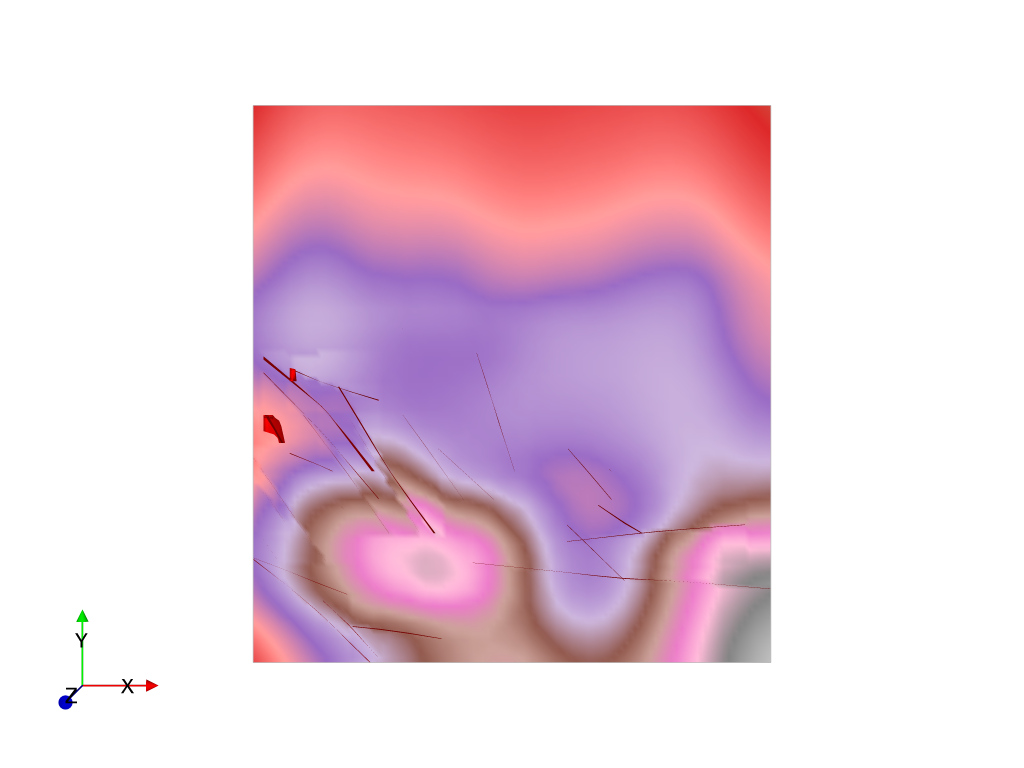

In [26]:
viewer.display()

In [27]:
for f in model.features:
    try:
        print(f.displacement)
    except:
        continue

0.0
0.016873107346891156
0.03364009452178929
0.0019809098772031546
0.03139388421460357
0.0013088154545806557
0.0017509828378849312
0.0019101630958744704
0.005005334779004399
0.0025645708231647984
0.011620158833236362
0.0093385751353863
0.00917939487739676
0.0019455364865388124
0.0
0.018447223231454375
0.00917939487739676
0.01798736915281793
0.013565695319775174
0.0009197081572728932
0.00794132620414479
0.01381330905442557
0.005518248943637359
0.00017686695332171023
0.0
0.00031836051597907843
0.013937115921750766
0.0
0.002263897002517891
0.0011142618059267744
0.037814154620181645
0.0
0.001591802579895392
0.0021931502211892068
0.00224621030718572
0.01176165239589373
0.0
0.0
0.021188661007940885


In [28]:
%load_ext autoreload

In [29]:
import matplotlib.pyplot as plt

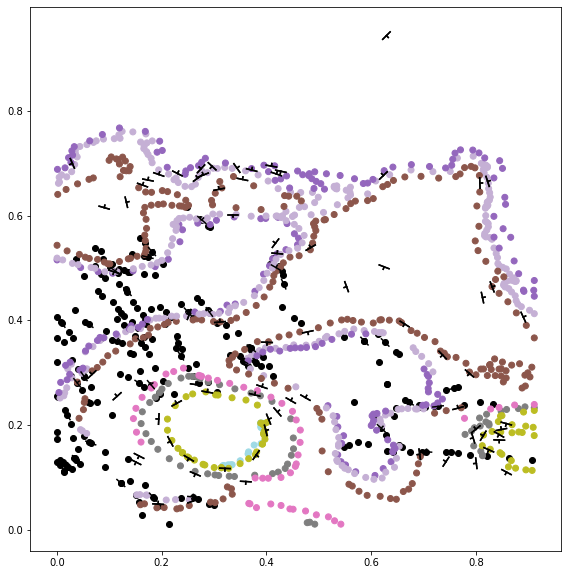

In [30]:
from LoopStructural.visualisation import MapView
map_view = MapView(model)
for f in faults:
#     print(f['feature'][0]))
    map_view.add_data(f['feature'][0],scale=0.02,point_colour='k',size=1)
map_view.add_data(strati['feature'],scale=0.01,cmap='tab20')

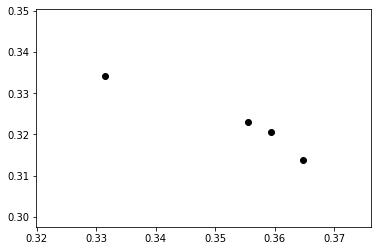

In [31]:
import matplotlib.pyplot as plt
val = faults[0]['feature'][0].get_interpolator().get_value_constraints()
plt.scatter(val[:,0],val[:,1],c='black')

[0.81915204 0.81915204 0.64278761 0.64278761 0.93969262 0.93969262
 0.77714596 0.77714596 0.5        0.5        0.25881905 0.25881905
 0.25881905 0.25881905 0.78801075 0.78801075 0.1391731  0.1391731
 0.34202014 0.34202014 0.27563736 0.27563736 0.34202014 0.34202014
 0.2419219  0.2419219  0.15643447 0.15643447 0.08715574 0.08715574
 0.2419219  0.2419219  0.1391731  0.1391731  0.60181502 0.60181502
 0.34202014 0.34202014 0.25881905 0.25881905 0.30901699 0.30901699
 0.2419219  0.2419219  0.54463904 0.54463904 0.65605903 0.65605903
 0.64278761 0.64278761 0.57357644 0.57357644 0.34202014 0.34202014
 0.4539905  0.4539905  0.40673664 0.40673664 0.25881905 0.25881905
 0.64278761 0.64278761 0.70710678 0.70710678 0.8480481  0.8480481
 0.70710678 0.70710678 0.58778525 0.58778525 0.57357644 0.57357644
 0.42261826 0.42261826 0.25881905 0.25881905 0.7193398  0.7193398
 0.64278761 0.64278761 0.76604444 0.76604444 0.57357644 0.57357644
 0.25881905 0.25881905 0.190809   0.190809   0.46947156 0.4694715

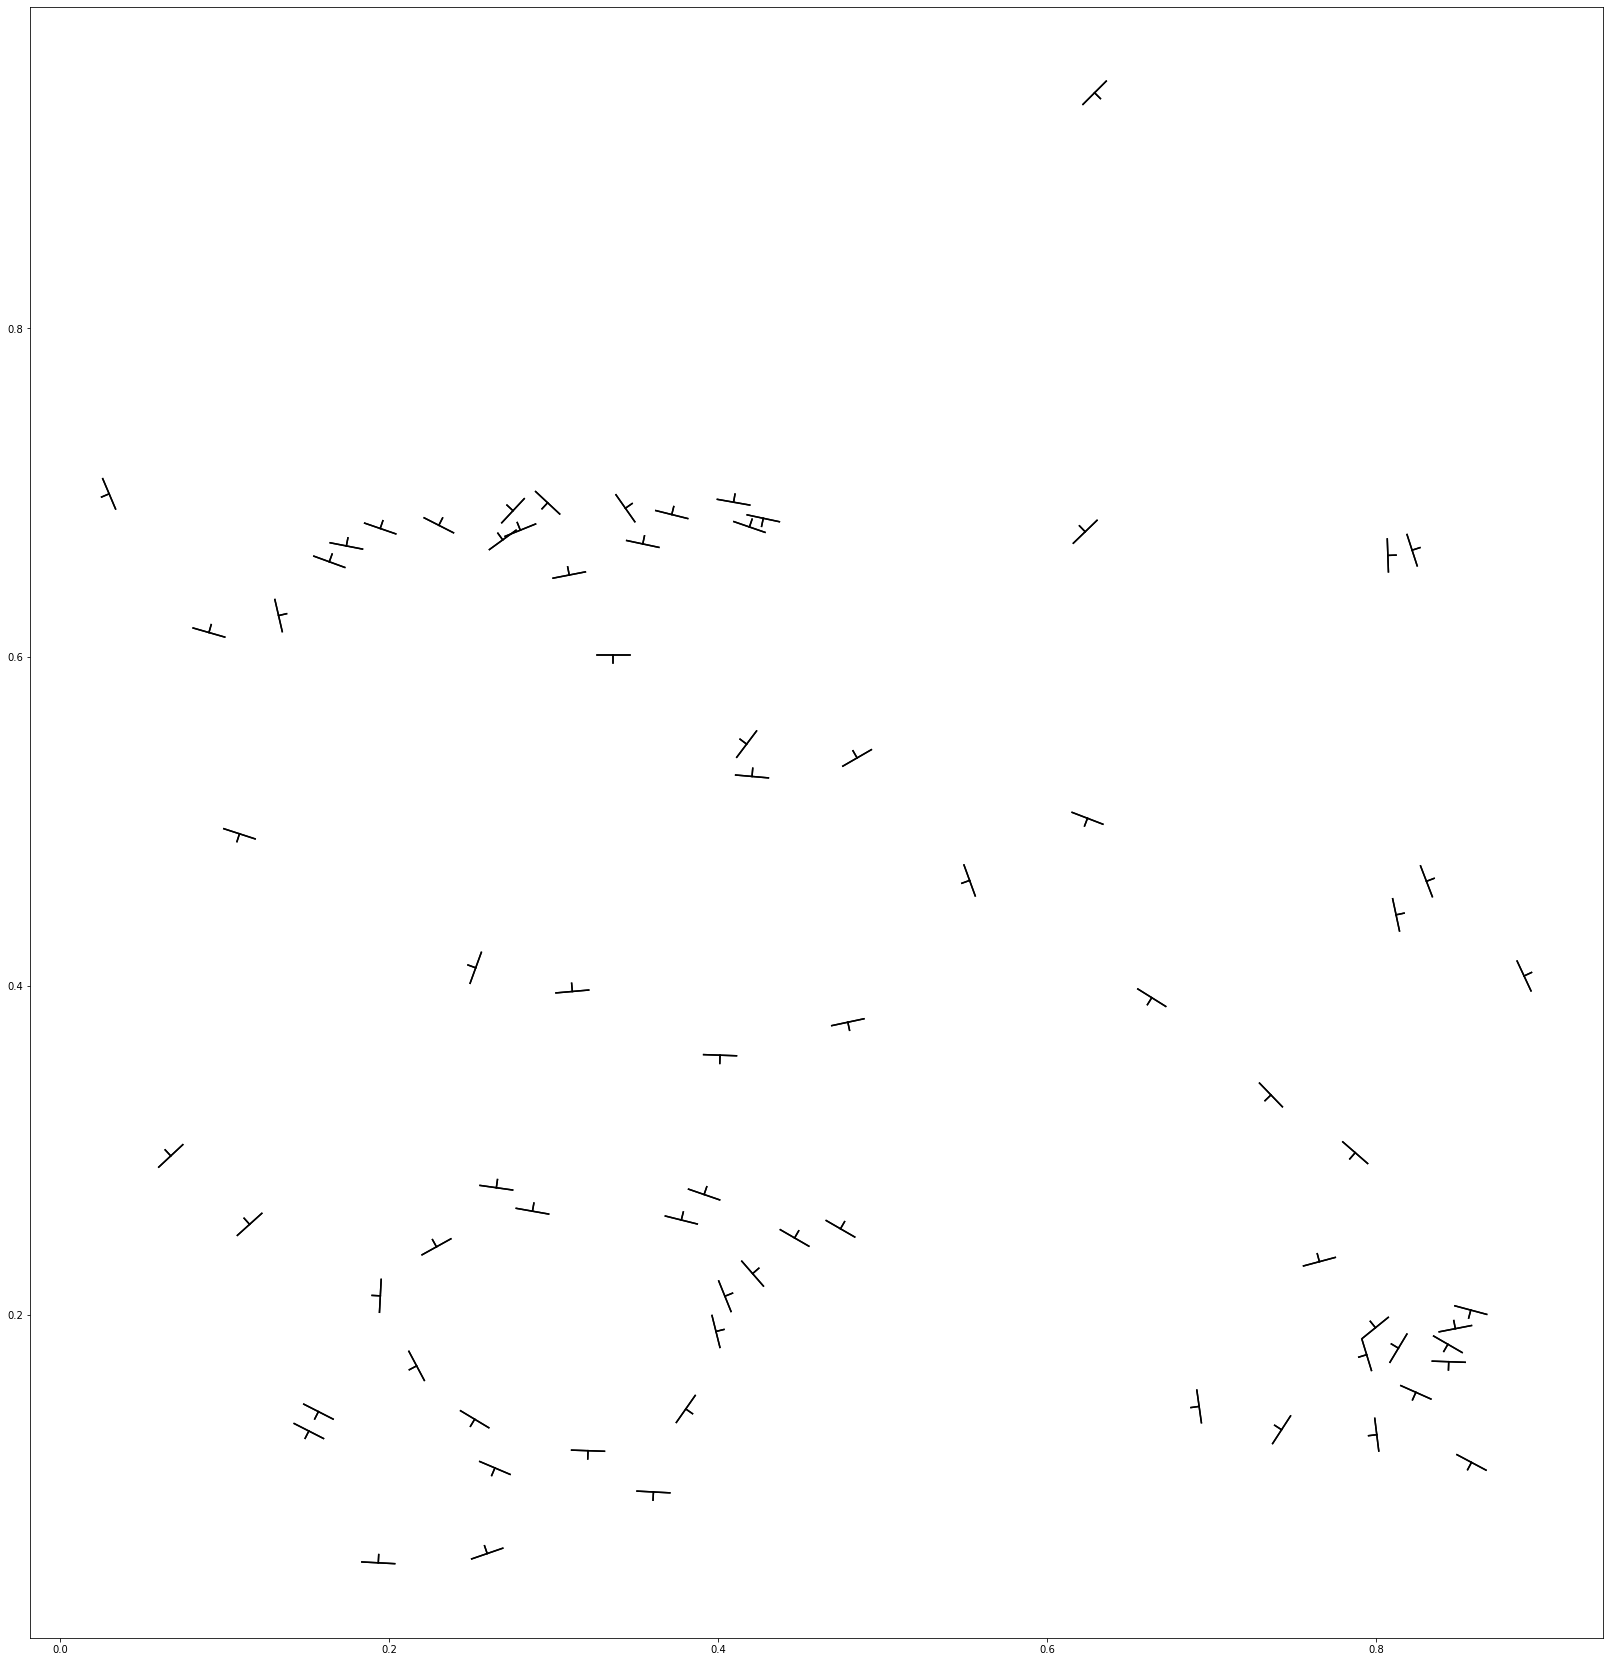

In [32]:
plt.figure(figsize=(30,30))
grad = strati['feature'].get_interpolator().get_gradient_constraints()
# print(grad)
print(np.linalg.norm(grad[:,3:5],axis=1))
grad[:,3:5]/=np.linalg.norm(grad[:,3:5],axis=1)[:,None]
t = grad[:,[4,3]]*np.array([1,-1]).T
n = grad[:,3:5]
t*=0.01
n*=0.005
p1 = grad[:,[0,1]]-t
p2 = grad[:,[0,1]]+t
# plt.scatter(val[:,0],val[:,1],c='black')
plt.plot([p1[:,0],p2[:,0]],[p1[:,1],p2[:,1]],'black')
p1 = grad[:,[0,1]]
p2 = grad[:,[0,1]]+n
plt.plot([p1[:,0],p2[:,0]],[p1[:,1],p2[:,1]],'black')
plt.gca().set_aspect('equal', adjustable='box')

<ipython-input-33-6fce9f2001b6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  displacements2['Z'] = 0
<ipython-input-33-6fce9f2001b6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  displacements2['Z'] = 0
<ipython-input-33-6fce9f2001b6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

<ipython-input-33-6fce9f2001b6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  displacements2['Z'] = 0
<ipython-input-33-6fce9f2001b6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  displacements2['Z'] = 0
<ipython-input-33-6fce9f2001b6>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-

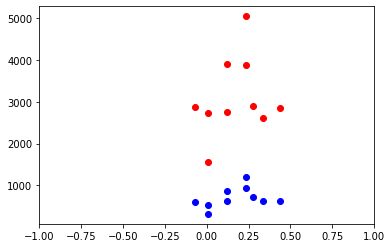

In [33]:
i = 0
plt.figure()
for f in faults:
    displacements2 = displacements[displacements['fname']==f['feature'].name]
    displacements2['Z'] = 0
    XYZ = model.scale(displacements2[['X','Y','Z']].to_numpy())
#     print(XYZ) 
    c2 = faults[i]['feature'][2].evaluate_value(XYZ)
    plt.clf()
    plt.xlim(-1,1)
    plt.plot(c2,displacements2['vertical_displacement'].to_numpy(),'bo')
    plt.plot(c2,displacements2['apparent_displacement'].to_numpy(),'ro')
    plt.savefig(f['feature'].name+'.png')
    i+=1
#XY = model.scale(displacements[['X','Y','Z']])

In [34]:
np.sum(faults[0]['feature'].get_interpolator().region)

AttributeError: 'FaultSegment' object has no attribute 'get_interpolator'

In [ ]:
faults[0]['feature'].support.get_node_values()

In [ ]:
model.data.loc[0]

In [ ]:
x = np.linspace(-1,1,100)
plt.plot(x,np.cos(x))

In [ ]:
plt.plot(x,np.arctan(x))

In [ ]:
test = ['a','b','c']

In [ ]:
'a' in test